In [1]:
import pandas as pd
import numpy as np
from scipy import interpolate
from scipy.signal import resample, iirfilter, lfilter

In [42]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 150

In [60]:
# df_vehicle_local_position = pd.read_csv('../data/log_31_2023-7-18-17-42-13_vehicle_local_position_0.csv')
# df_vehicle_angular_velocity = pd.read_csv('log_31_2023-7-18-17-42-13_vehicle_angular_velocity_0.csv')
df_angular_velocity = pd.read_csv('../scripts/build/flow_angular_velocity.csv')
df_linear_velocity = pd.read_csv('../scripts/build/flow_linear_velocity.csv')

In [61]:
dead_time = 0
dead_end = 0

In [62]:
# thx_gt = df_vehicle_angular_velocity['xyz[0]'].values[dead_time:-dead_end]
# thy_gt = df_vehicle_angular_velocity['xyz[1]'].values[dead_time:-dead_end]
# thz_gt = df_vehicle_angular_velocity['xyz[2]'].values[dead_time:-dead_end]
# t1 = np.linspace(0, 10, len(thz_gt))

thx = df_angular_velocity['x'].values[:]
thy = df_angular_velocity['y'].values[:]
thz = df_angular_velocity['z'].values[:]
t2 = np.linspace(0, 10, len(thz))

In [63]:
# thx_resampled = resample(thx, len(thx_gt))
# thy_resampled = resample(thy, len(thy_gt))
# thz_resampled = resample(thz, len(thz_gt))

In [64]:
sampling_rate = len(thx) * 10
nyquist_frequency = sampling_rate / 2
cutoff_frequency = 5e3
order = 5
gain = 45
cutoff_gain_frequency = cutoff_frequency / 10
gain_modification = 10 ** (gain / 20)

b, a = iirfilter(order, cutoff_frequency / nyquist_frequency, btype='low', ftype='butter')
b = b * gain_modification

In [65]:
filtered_thx = lfilter(b, a, thx)
filtered_thy = lfilter(b, a, thy)
filtered_thz = lfilter(b, a, thz)

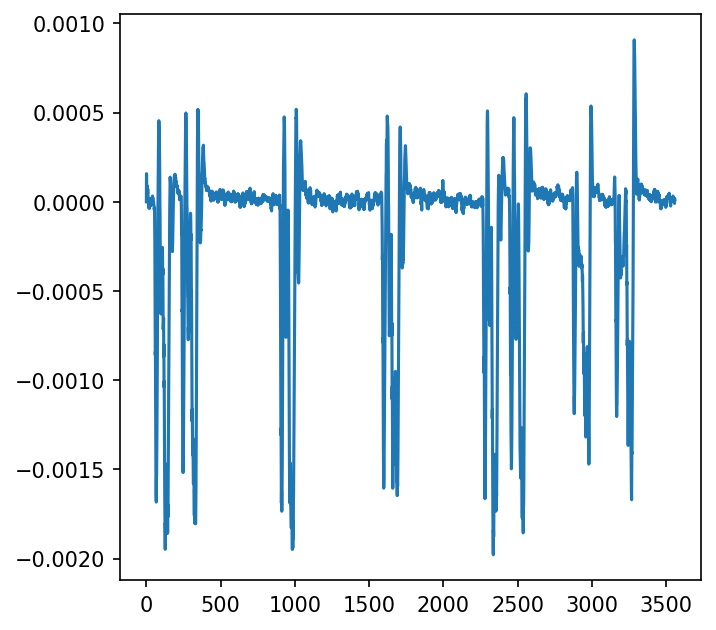

In [66]:
plt.plot(thx)
# plt.plot(filtered_thx)

In [67]:
# vx_gt = df_vehicle_local_position['vx'].values[dead_time:-dead_end]
# vy_gt = df_vehicle_local_position['vy'].values[dead_time:-dead_end]
# vz_gt = df_vehicle_local_position['vz'].values[dead_time:-dead_end]
# t1 = np.linspace(0, 10, len(vx_gt))

vx = df_linear_velocity['x'].values[:]
vy = df_linear_velocity['y'].values[:]
vz = df_linear_velocity['z'].values[:]
t2 = np.linspace(0, 10, len(vx))

In [68]:
# vx_resampled = resample(vx, len(thx_gt))
# vy_resampled = resample(vy, len(thx_gt))
# vz_resampled = resample(vz, len(thx_gt))

# vx_gt = resample(vz_gt, len(thx_gt))
# vy_gt = resample(vy_gt, len(thx_gt))
# vz_gt = resample(vz_gt, len(thx_gt))

In [69]:
gain = 10
order = 5
cutoff_frequency = 25e3
sampling_rate = len(vx) * 10
nyquist_frequency = sampling_rate / 2
cutoff_gain_frequency = cutoff_frequency / 10
gain_modification = 10 ** (gain / 20)

b, a = iirfilter(order, cutoff_gain_frequency / nyquist_frequency, btype='low', ftype='butter')
b = b * gain_modification

In [70]:
filtered_vx = lfilter(b, a, vx)
filtered_vy = lfilter(b, a, vy)
filtered_vz = lfilter(b, a, vz)

# filtered_vx = 1*vx_resampled + 0*filtered_thy
# filtered_vy = 1*filtered_vy - 0*filtered_thx

# filtered_vx = filtered_vx - filtered_vx.mean()
# filtered_vy = filtered_vy - filtered_vy.mean()
# filtered_vz = filtered_vz - filtered_vz.mean()

filtered_vx = (vx - vx.mean())[0:]
filtered_vy = (vy - vy.mean())[0:]

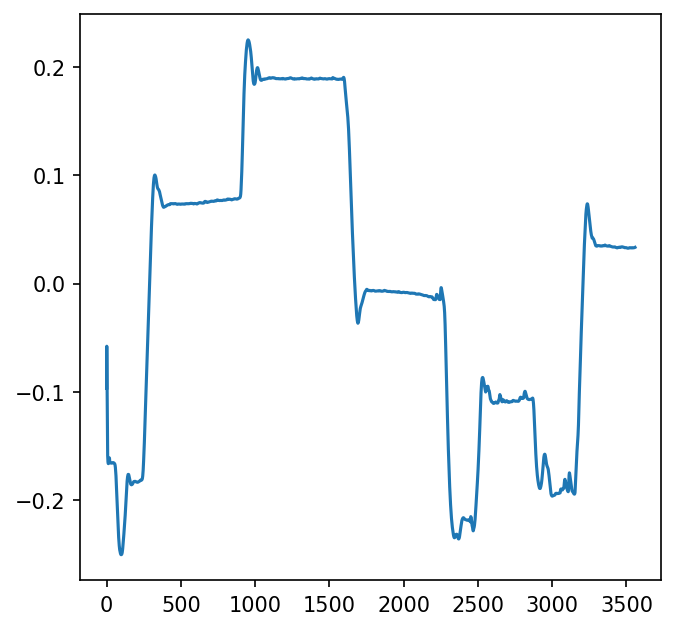

In [71]:
plt.plot(filtered_vx)

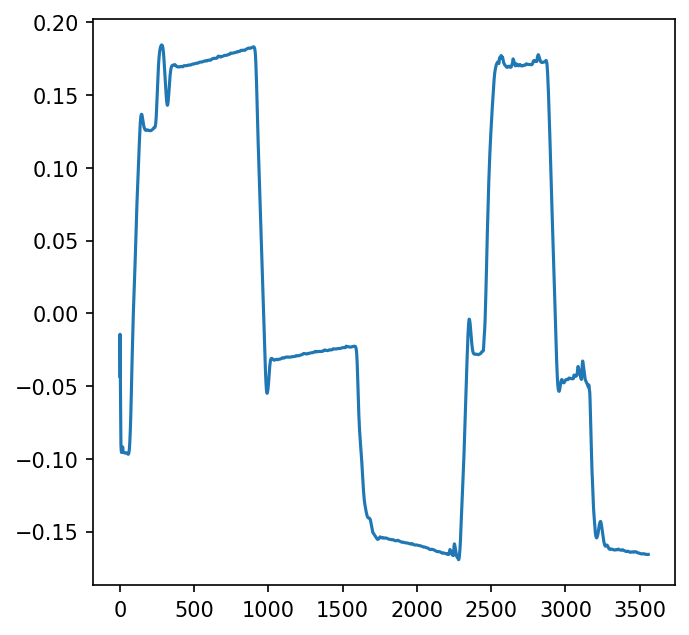

In [72]:
plt.plot(filtered_vy)

In [73]:
# x_gt = np.cumsum(vx_gt) * (t1[1] - t1[0])
# y_gt = np.cumsum(vy_gt) * (t1[1] - t1[0])
# x_gt = df_vehicle_local_position['x'].values[dead_time:-dead_end]
# y_gt = df_vehicle_local_position['y'].values[dead_time:-dead_end]

x = np.cumsum(filtered_vx) * (t2[1] - t2[0])
y = np.cumsum(filtered_vy) * (t2[1] - t2[0])

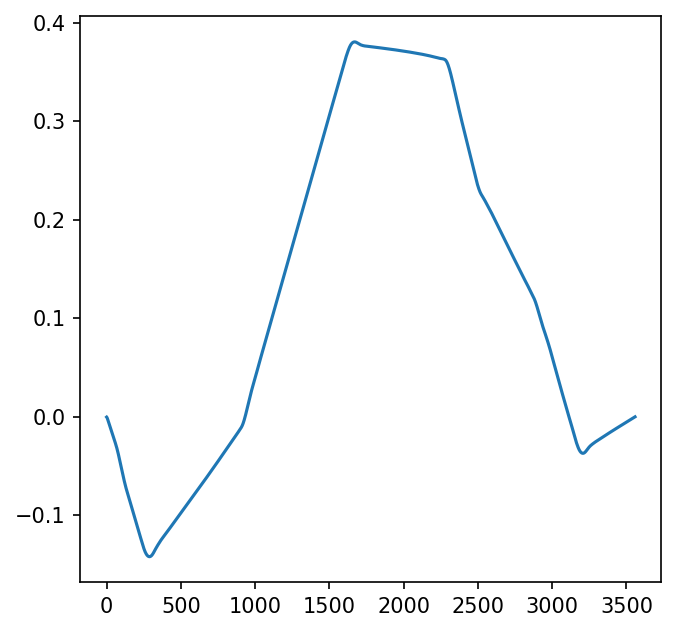

In [74]:
plt.plot(x)

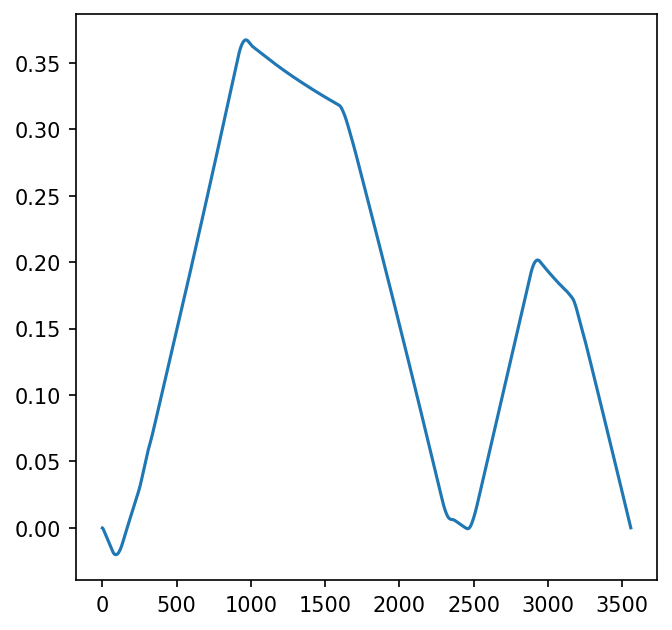

In [75]:
plt.plot(y)

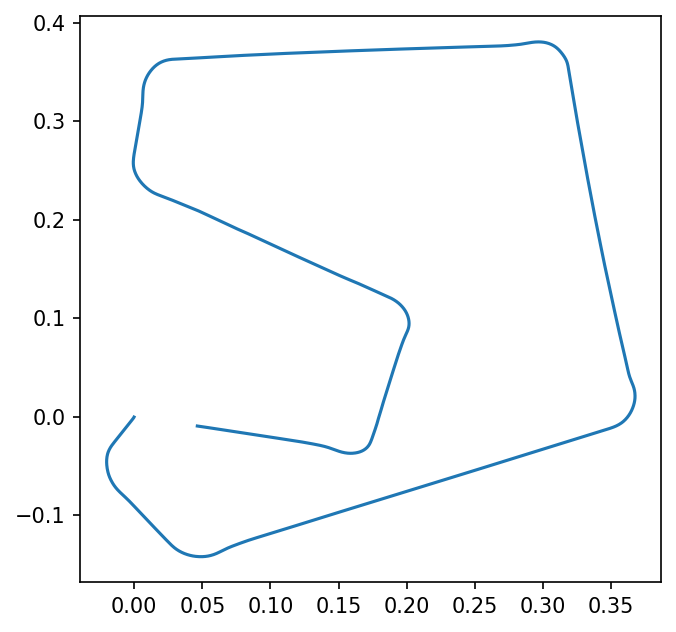

In [78]:
plt.plot(y[:-100], x[:-100], '-')